In [1]:
import numpy as np
import pandas as pd
import sys 
sys.path.append('/home/riccardo/GraRed')
from GraRed import Catalogue
import matplotlib.pyplot as plt

In [2]:
df =pd.read_parquet('/home/riccardo/GraRed/Data/SDSS_galaxy_cat.parquet')

In [3]:

gal = Catalogue.Galaxies(df['RA[deg]'].values,df['DEC[deg]'].values,df['Z'].values,redshift_err=df['zerr'].values)
gal

In [4]:
df =pd.read_parquet('/home/riccardo/GraRed/Data/WH15_cluster_cat.parquet')
m = 1.08*np.log10(df.RL500.values) - 1.37 +14
df['M500']=10**m

rand_gen = np.random.default_rng(1234)


dd = df.loc[rand_gen.choice(df.index,500,replace=False)]


In [5]:
cl = Catalogue.Cluster(dd['RA[deg]'].values,dd['Dec[deg]'].values,dd['z'].values,mass=dd['M500'].values,radius=dd['R500[Mpc]'].values,
concentration=None,fr0=1e-4,
                compute_radius=True,compute_conc=True,convert_to_fr=True,is_crit=True,
                delta=500,gravity='f(R)', seed=1234)

cl

if the masses are in logharitmic scale, please change it or the code will not work
attention convertion works only if M500 are given


In [6]:
cl.data

,ID,RA,Dec,redshift,M_500,Dc,Dm,R_500,c_500
0,0,121.07097,40.96972,0.5002,1.795504e+14,1947.088481,1947.088481,0.203808,3.031797
1,1,152.55180,7.98580,0.4567,1.723242e+14,1799.018680,1799.018680,0.204578,2.968167
2,2,343.95486,32.73777,0.4643,1.747235e+14,1825.168610,1825.168610,0.204899,2.992159
3,3,240.42873,22.83217,0.4050,1.567219e+14,1617.938944,1617.938944,0.202329,3.053472
4,4,28.18143,-4.14231,0.0945,6.996513e+13,409.329013,409.329013,0.173601,3.291944
...,...,...,...,...,...,...,...,...,...
495,495,322.50192,4.71461,0.6011,1.671350e+14,2275.903491,2275.903491,0.191039,2.849439
496,496,156.40155,36.26064,0.1218,7.730769e+13,524.023631,524.023631,0.177798,3.354698
497,497,198.71535,27.47644,0.1980,1.135806e+14,835.571915,835.571915,0.196711,3.208656
498,498,10.29061,10.50953,0.5234,1.450556e+14,2024.484307,2024.484307,0.188051,2.891908


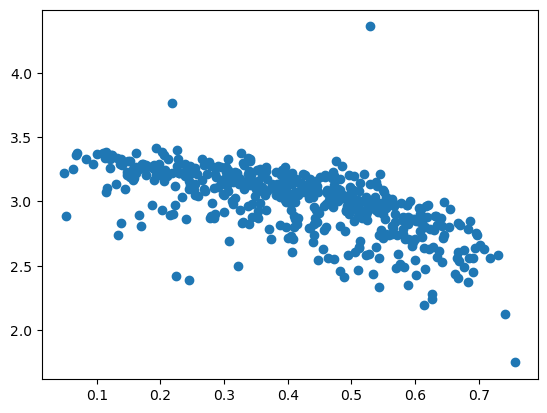

In [11]:
#plt.scatter(np.array(dd['R500[Mpc]']),np.array(dd['M500']))
#plt.scatter(np.array(dd['R500[Mpc]']),np.array(cl.concentration))
#plt.scatter(np.array(dd['M500']),np.array(cl.concentration))
plt.scatter(np.array(dd['z']),np.array(cl.concentration))